In [2]:
import re
import pandas as pd

In [3]:
f=open('WhatsApp.txt', 'r',encoding='utf-8')

In [4]:
data = f.read()

In [5]:
print(data)

03/06/23, 9:44 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
03/06/23, 9:44 pm - Ankit Soni created group "Bot Killers 💀"
03/06/23, 9:44 pm - Ankit Soni added you
03/06/23, 9:44 pm - Ankit Soni changed this group's icon
03/06/23, 9:44 pm - Ankit Soni: Sabko msg krne se acha grp bana diya 😅, or kisko add Krna h  bata dena
03/06/23, 10:41 pm - Subrota: Gupta ko ?
03/06/23, 10:42 pm - Ankit Soni: Agr sab sehmat h to add kr deta hu
03/06/23, 10:42 pm - Subrota: Chor fir rehen de😂
03/06/23, 10:42 pm - Subrota: 11 bje khelenge?
03/06/23, 10:42 pm - Subrota: @919826139904 @918755235063 ?
03/06/23, 10:43 pm - Ankit Soni: Ok waise me online hu
03/06/23, 10:43 pm - Ankit Soni: Aayega to aaja
03/06/23, 10:43 pm - Subrota: Khana bnana h bhai fir ata hu😅
03/06/23, 10:43 pm - Ankit Soni: 🤭... Aaja jb time mile 🙏
03/06/23, 10:44 pm - Subrota: Charge karle harami😏
03/06/23, 10:44 pm - Ankit Soni: Dibe 🤭


In [6]:
pattern = '\\d{1,2}/\\d{1,2}/\\d{2,4},\\s\\d{1,2}:\\d{2}\\s\\b{2}\\s-\\s'

In [7]:
messages =re.split(pattern,data)[1:]

error: nothing to repeat at position 43

In [21]:
messages

[]

In [7]:
dates = re.findall(pattern,data)
dates

[]

In [10]:
df= pd.DataFrame({"user_message":messages,"message_dates":dates})

In [11]:
df

,user_message,message_dates


In [12]:
df['message_dates']=pd.to_datetime(df['message_dates'],format = "%d/%m/%y, %H:%M - ")
df

,user_message,message_dates


In [33]:
df.shape


(62, 2)

In [34]:
df.rename(columns={"message_dates":"dates"},inplace =True)

In [35]:
df

,user_message,dates
0,"Akanksha ""Team""\n",2021-01-18 15:05:00
1,You were added\n,2021-01-19 15:05:00
2,Monika Hope you candidates are ready to atten...,2022-08-27 14:56:00
3,Shweta: <Media omitted>\n\n,2022-08-27 16:28:00
4,Aknasha: <Media omitted>\n,2022-08-27 17:46:00
...,...,...
57,Ashish : <Media omitted>\n\n,2022-08-30 15:42:00
58,Bhaviya: Syllabus \n\n,2022-08-30 16:33:00
59,Bhaviya: 👍🏻\n,2022-08-30 19:04:00
60,Ashish : 👌🏻\n,2022-08-30 19:04:00


In [36]:
users = []
messages=[]
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s',message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(" ".join(entry[2:]))
    else:
        users.append("group notification")
        messages.append(entry[0])
df["user"]=users
df["messages"]=messages

<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\w'
C:\Users\ayush\AppData\Local\Temp\ipykernel_15448\1198731606.py:4: SyntaxWarning: invalid escape sequence '\w'
  entry = re.split('([\w\W]+?):\s',message)


In [37]:
df

,user_message,dates,user,messages
0,"Akanksha ""Team""\n",2021-01-18 15:05:00,group notification,"Akanksha ""Team""\n"
1,You were added\n,2021-01-19 15:05:00,group notification,You were added\n
2,Monika Hope you candidates are ready to atten...,2022-08-27 14:56:00,group notification,Monika Hope you candidates are ready to atten...
3,Shweta: <Media omitted>\n\n,2022-08-27 16:28:00,Shweta,<Media omitted>\n\n
4,Aknasha: <Media omitted>\n,2022-08-27 17:46:00,Aknasha,<Media omitted>\n
...,...,...,...,...
57,Ashish : <Media omitted>\n\n,2022-08-30 15:42:00,Ashish,<Media omitted>\n\n
58,Bhaviya: Syllabus \n\n,2022-08-30 16:33:00,Bhaviya,Syllabus \n\n
59,Bhaviya: 👍🏻\n,2022-08-30 19:04:00,Bhaviya,👍🏻\n
60,Ashish : 👌🏻\n,2022-08-30 19:04:00,Ashish,👌🏻\n


In [38]:
df.drop(columns=["user_message"],inplace= True)

In [39]:
df

,dates,user,messages
0,2021-01-18 15:05:00,group notification,"Akanksha ""Team""\n"
1,2021-01-19 15:05:00,group notification,You were added\n
2,2022-08-27 14:56:00,group notification,Monika Hope you candidates are ready to atten...
3,2022-08-27 16:28:00,Shweta,<Media omitted>\n\n
4,2022-08-27 17:46:00,Aknasha,<Media omitted>\n
...,...,...,...
57,2022-08-30 15:42:00,Ashish,<Media omitted>\n\n
58,2022-08-30 16:33:00,Bhaviya,Syllabus \n\n
59,2022-08-30 19:04:00,Bhaviya,👍🏻\n
60,2022-08-30 19:04:00,Ashish,👌🏻\n


In [40]:
df['year']=df['dates'].dt.year

In [41]:
df['month']=df['dates'].dt.month_name()
df['day_name'] = df['dates'].dt.day_name()
df['date']=df['dates'].dt.date
df['hour']=df['dates'].dt.hour
df['minute']=df['dates'].dt.minute

In [42]:
df

,dates,user,messages,year,month,day_name,date,hour,minute
0,2021-01-18 15:05:00,group notification,"Akanksha ""Team""\n",2021,January,Monday,2021-01-18,15,5
1,2021-01-19 15:05:00,group notification,You were added\n,2021,January,Tuesday,2021-01-19,15,5
2,2022-08-27 14:56:00,group notification,Monika Hope you candidates are ready to atten...,2022,August,Saturday,2022-08-27,14,56
3,2022-08-27 16:28:00,Shweta,<Media omitted>\n\n,2022,August,Saturday,2022-08-27,16,28
4,2022-08-27 17:46:00,Aknasha,<Media omitted>\n,2022,August,Saturday,2022-08-27,17,46
...,...,...,...,...,...,...,...,...,...
57,2022-08-30 15:42:00,Ashish,<Media omitted>\n\n,2022,August,Tuesday,2022-08-30,15,42
58,2022-08-30 16:33:00,Bhaviya,Syllabus \n\n,2022,August,Tuesday,2022-08-30,16,33
59,2022-08-30 19:04:00,Bhaviya,👍🏻\n,2022,August,Tuesday,2022-08-30,19,4
60,2022-08-30 19:04:00,Ashish,👌🏻\n,2022,August,Tuesday,2022-08-30,19,4


In [43]:
df[df['messages']=='<Media omitted>\n'].shape[0]


33

In [44]:
media_messsages=df[df['messages']=='<Media omitted>\n'].shape[0]

In [45]:
media_messsages

33

In [46]:
from urlextract import URLExtract
extractor=URLExtract()
urls= extractor.find_urls("Text with url : www.gmail.com")
print(urls)

['www.gmail.com']


In [47]:
links=[]
for message in df['messages']:
    links.extend(extractor.find_urls(message))

In [48]:
links

['https://forms.gle/dNBpdL5NMsHmhF9k7',
 'https://www.youtube.com/watch?v=23fQ9-XUSCU',
 'https://www.youtube.com/watch?v=iBIcCGpSpeM&t=574s',
 'https://tinyurl.com/24vee9jt',
 'https://youtu.be/ZWlyGYWw7Cw',
 'https://forms.gle/Ux6YWQkjMAkhvthR6',
 'https://chat.whatsapp.com/D4VpUnfyafU0dS2Hp3vjuJ',
 'https://forms.gle/Ux6YWQkjMAkhvthR6',
 'https://chat.whatsapp.com/D4VpUnfyafU0dS2Hp3vjuJ',
 'https://forms.gle/Ux6YWQkjMAkhvthR6',
 'https://forms.gle/Ux6YWQkjMAkhvthR6']

In [49]:
round((df["user"].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={"index":"Name","user":"Name","count":"percentage"})

,Name,percentage
0,Swatika,24.19
1,Ashish,14.52
2,Monika,11.29
3,Ayuka,9.68
4,Ayushi,6.45
5,Bhaviya,4.84
6,group notification,4.84
7,Shweta,3.23
8,Aayushi,3.23
9,Ayushi,1.61


In [50]:
temp = df[df['user'] != 'group notification']
temp=temp[temp['messages']!="<Media omitted>\n"]

In [51]:
f = open ("stop_hinglish.txt")
stop_words =f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [52]:
words=[]
for message in temp["messages"]:
    for word in message.lower().split():
        if word not in  stop_words:
             words.extend(message.split())
words

['<Media',
 'omitted>',
 '<Media',
 'omitted>',
 '🫣🤭',
 'https://forms.gle/dNBpdL5NMsHmhF9k7',
 'Swati',
 'Register',
 'wala',
 'form',
 'Swati',
 'Register',
 'wala',
 'form',
 'Swati',
 'Register',
 'wala',
 'form',
 'Thankyou',
 '🔥',
 "*Founder's",
 'Opinion',
 '|',
 'Student',
 'should',
 'be',
 'upskilled',
 'for',
 'Electric',
 'Vehicle',
 'Industry*',
 '➖➖➖➖➖',
 '🤔💭',
 'Our',
 'industry',
 'leader',
 '➖➖➖➖➖',
 '💢',
 '*Click',
 'Here',
 'to',
 'watch*',
 'https://www.youtube.com/watch?v=23fQ9-XUSCU',
 '➖➖➖➖➖',
 '💢',
 '*Click',
 'Here',
 'to',
 'watch',
 'full',
 'Interview',
 'Session*',
 'https://www.youtube.com/watch?v=iBIcCGpSpeM&t=574s',
 '➖➖➖➖➖',
 '💢',
 'To',
 'take',
 'part',
 'in',
 '*28',
 'August',
 '2022*',
 'Free',
 'workshop',
 'of',
 'and',
 'clear',
 'your',
 'query',
 'and',
 'doubts,',
 'kindly',
 'fill',
 'this',
 'form',
 'here',
 '👇🏻👇🏻',
 'https://tinyurl.com/24vee9jt',
 '🔥',
 "*Founder's",
 'Opinion',
 '|',
 'Student',
 'should',
 'be',
 'upskilled',
 'for',
 

In [53]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(25))


,0,1
0,and,222
1,the,170
2,➖➖➖➖➖,156
3,💢,117
4,fill,101
5,Vehicle,100
6,Free,100
7,Live,97
8,Design,97
9,our,97


In [54]:
import emoji
emojis=[]

In [55]:
for message in df['messages']:
    emojis.extend([c  for c in message if c in emoji.EMOJI_DATA])

In [56]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,➖,32
1,🏻,13
2,👇,10
3,💢,3
4,🔥,2
5,😍,2
6,👌,2
7,🔜,1
8,🔗,1
9,⚜,1


In [57]:
df

,dates,user,messages,year,month,day_name,date,hour,minute
0,2021-01-18 15:05:00,group notification,"Akanksha ""Team""\n",2021,January,Monday,2021-01-18,15,5
1,2021-01-19 15:05:00,group notification,You were added\n,2021,January,Tuesday,2021-01-19,15,5
2,2022-08-27 14:56:00,group notification,Monika Hope you candidates are ready to atten...,2022,August,Saturday,2022-08-27,14,56
3,2022-08-27 16:28:00,Shweta,<Media omitted>\n\n,2022,August,Saturday,2022-08-27,16,28
4,2022-08-27 17:46:00,Aknasha,<Media omitted>\n,2022,August,Saturday,2022-08-27,17,46
...,...,...,...,...,...,...,...,...,...
57,2022-08-30 15:42:00,Ashish,<Media omitted>\n\n,2022,August,Tuesday,2022-08-30,15,42
58,2022-08-30 16:33:00,Bhaviya,Syllabus \n\n,2022,August,Tuesday,2022-08-30,16,33
59,2022-08-30 19:04:00,Bhaviya,👍🏻\n,2022,August,Tuesday,2022-08-30,19,4
60,2022-08-30 19:04:00,Ashish,👌🏻\n,2022,August,Tuesday,2022-08-30,19,4


In [58]:
df['month_num']=df['dates'].dt.month

In [67]:
timeline=df.groupby(['year','month_num','month']).count()['messages'].reset_index()

In [68]:
timeline['year']

0    2021
1    2022
Name: year, dtype: int32

In [69]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+'-'+str(timeline['year'][i]))

In [71]:
timeline['time']=time

In [72]:
timeline

,year,month_num,month,messages,time
0,2021,1,January,2,January-2021
1,2022,8,August,60,August-2022


In [75]:
import matplotlib.pyplot as plt 

<function matplotlib.pyplot.show(close=None, block=None)>

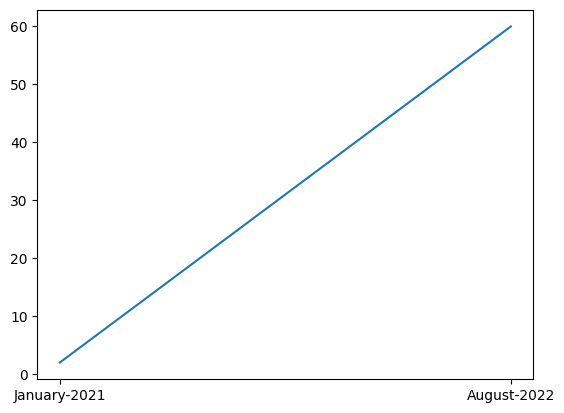

In [77]:

plt.plot(timeline['time'],timeline['messages'])
plt.show

In [79]:
df['only_date']=df['dates'].dt.date

In [82]:
daly_timeline=df.groupby("only_date").count()['messages'].reset_index()

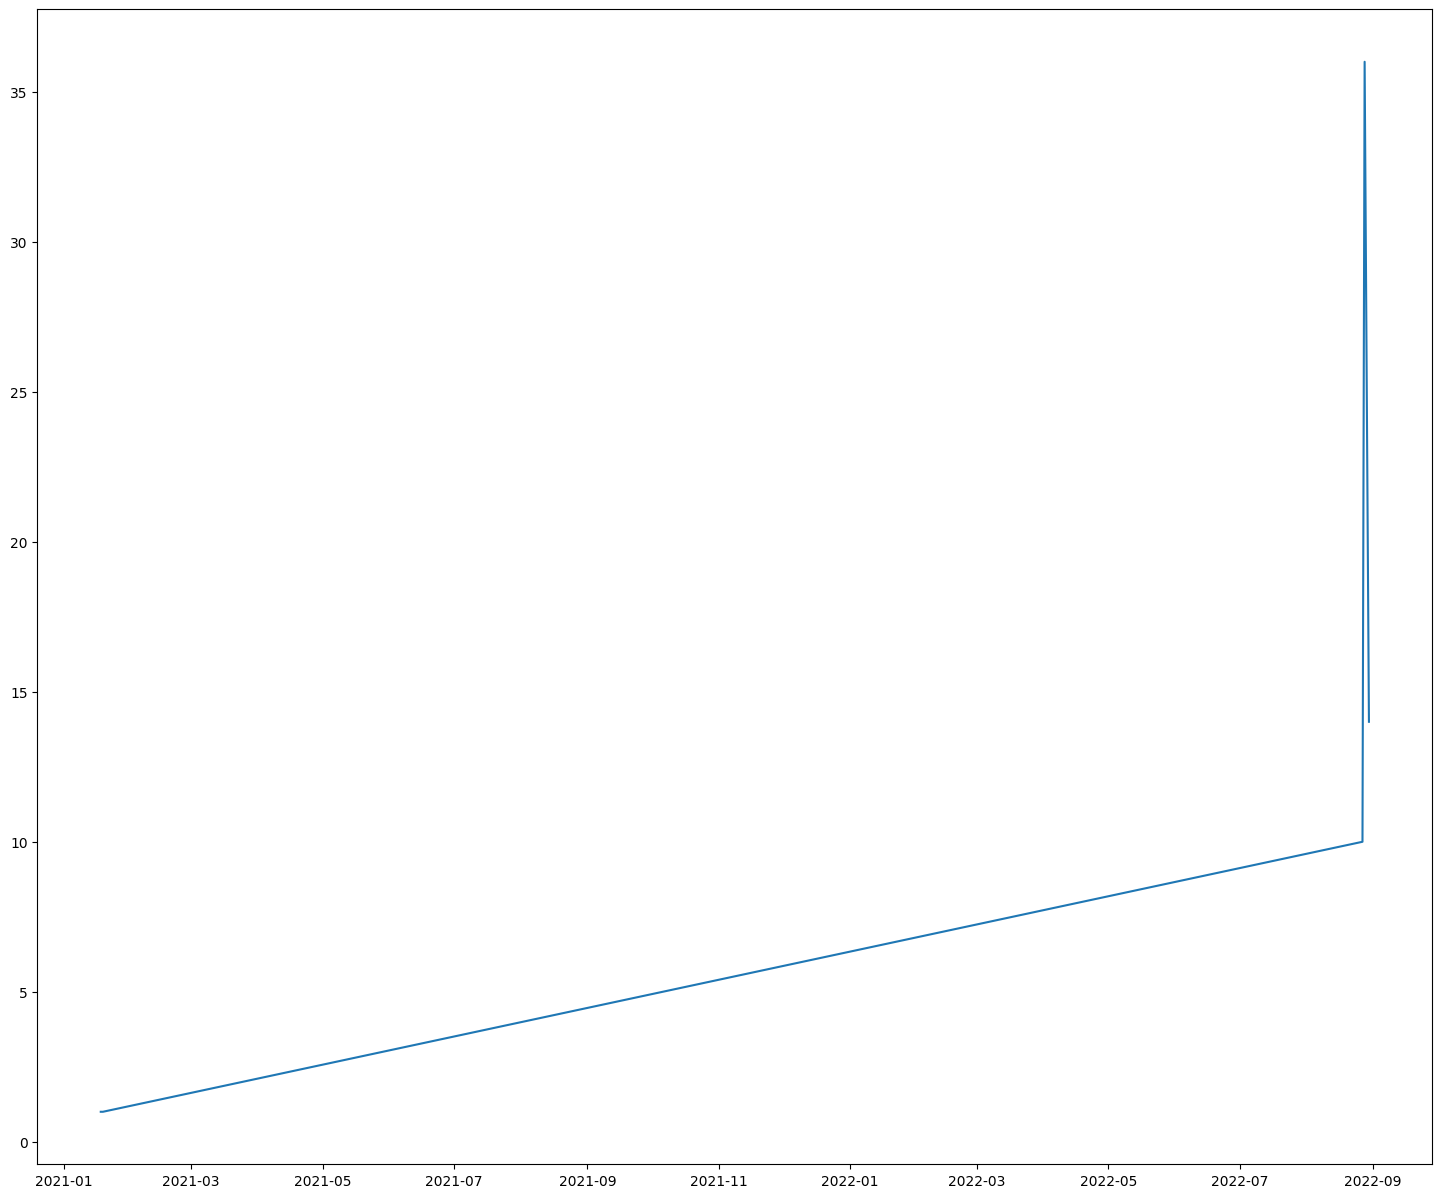

In [84]:
plt.figure(figsize= (18,15))
plt.plot(daly_timeline['only_date'],daly_timeline['messages'])

In [90]:
df["day_name"]= df['dates'].dt.day_name
df

,dates,user,messages,year,month,day_name,date,hour,minute,month_num,only_date
0,2021-01-18 15:05:00,group notification,"Akanksha ""Team""\n",2021,January,<bound method PandasDelegate._add_delegate_acc...,2021-01-18,15,5,1,2021-01-18
1,2021-01-19 15:05:00,group notification,You were added\n,2021,January,<bound method PandasDelegate._add_delegate_acc...,2021-01-19,15,5,1,2021-01-19
2,2022-08-27 14:56:00,group notification,Monika Hope you candidates are ready to atten...,2022,August,<bound method PandasDelegate._add_delegate_acc...,2022-08-27,14,56,8,2022-08-27
3,2022-08-27 16:28:00,Shweta,<Media omitted>\n\n,2022,August,<bound method PandasDelegate._add_delegate_acc...,2022-08-27,16,28,8,2022-08-27
4,2022-08-27 17:46:00,Aknasha,<Media omitted>\n,2022,August,<bound method PandasDelegate._add_delegate_acc...,2022-08-27,17,46,8,2022-08-27
...,...,...,...,...,...,...,...,...,...,...,...
57,2022-08-30 15:42:00,Ashish,<Media omitted>\n\n,2022,August,<bound method PandasDelegate._add_delegate_acc...,2022-08-30,15,42,8,2022-08-30
58,2022-08-30 16:33:00,Bhaviya,Syllabus \n\n,2022,August,<bound method PandasDelegate._add_delegate_acc...,2022-08-30,16,33,8,2022-08-30
59,2022-08-30 19:04:00,Bhaviya,👍🏻\n,2022,August,<bound method PandasDelegate._add_delegate_acc...,2022-08-30,19,4,8,2022-08-30
60,2022-08-30 19:04:00,Ashish,👌🏻\n,2022,August,<bound method PandasDelegate._add_delegate_acc...,2022-08-30,19,4,8,2022-08-30


In [89]:
df['day_name'].value_counts()

day_name
<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of <pandas.core.indexes.accessors.DatetimeProperties object at 0x000002604F7FCA40>>    62
Name: count, dtype: int64